In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_combined = pd.read_excel('monte_carlo_results.xlsx', sheet_name='sheet1')

In [22]:
df_combined.head()

,i_trial,n_agents,converged,objective_val,N,dt,radius,t_solve_step,dist_to_goal
0,0,3,True,763.670325,10,0.1,0.35,0.725852,[0.088 0.008 0.077]
1,1,3,True,1337.270357,10,0.1,0.35,0.703304,[0.013 0.072 0.08 ]
2,2,3,True,955.405435,10,0.1,0.35,0.691865,[0.08 0.005 0.084]
3,3,3,False,None,10,0.1,0.35,None,None
4,4,3,True,462.855107,10,0.1,0.35,0.908094,[0.027 0.023 0.003]


In [42]:
success_statistics = df_combined.groupby(['n_agents','converged']).count()

In [55]:
success_statistics = success_statistics.reset_index()

In [75]:
success_statistics['n_agents'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10])

In [66]:
(success_statistics.loc[success_statistics['converged']==True]['i_trial']/30).to_list()

[0.8666666666666667,
 0.8333333333333334,
 0.6333333333333333,
 0.5,
 0.36666666666666664,
 0.26666666666666666,
 0.36666666666666664,
 0.13333333333333333]

Text(0, 0.5, 'Success Probability')

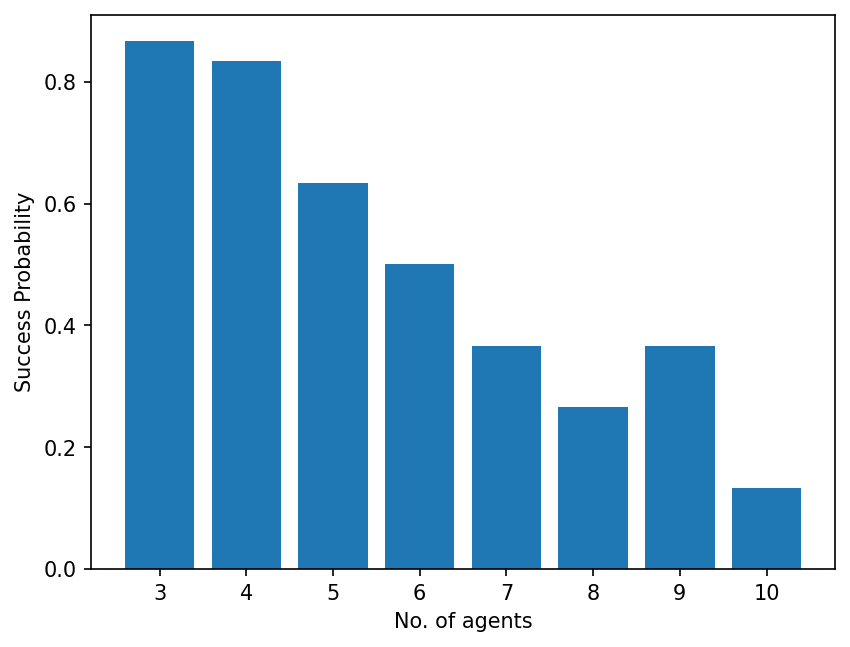

In [82]:
plt.figure(dpi=150)
plt.bar(success_statistics['n_agents'].unique(),(success_statistics.loc[success_statistics['converged']==True]['i_trial']/30).to_list())
plt.xlabel('No. of agents')
plt.ylabel('Success Probability')

In [4]:
df_combined = df_combined.replace(to_replace='None', value=np.nan).dropna()

In [5]:
df_combined.columns

Index(['i_trial', 'n_agents', 'converged', 'objective_val', 'N', 'dt',
       'radius', ' t_solve_step', ' dist_to_goal'],
      dtype='object')

In [9]:
df_combined.columns = ['i_trial','n_agents','converged','objective_val','N','dt','radius','t_solve_step','dist_to_goal']

In [10]:
df_combined.columns

Index(['i_trial', 'n_agents', 'converged', 'objective_val', 'N', 'dt',
       'radius', 't_solve_step', 'dist_to_goal'],
      dtype='object')

In [11]:
df_combined.head()

,i_trial,n_agents,converged,objective_val,N,dt,radius,t_solve_step,dist_to_goal
0,0,3,True,763.670325,10,0.1,0.35,0.725852,[0.088 0.008 0.077]
1,1,3,True,1337.270357,10,0.1,0.35,0.703304,[0.013 0.072 0.08 ]
2,2,3,True,955.405435,10,0.1,0.35,0.691865,[0.08 0.005 0.084]
4,4,3,True,462.855107,10,0.1,0.35,0.908094,[0.027 0.023 0.003]
5,5,3,True,2573.569772,10,0.1,0.35,0.702549,[0.083 0.024 0.024]


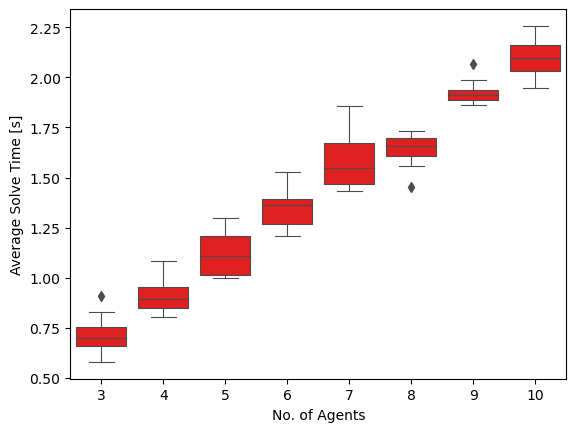

In [17]:
sns.boxplot(data=df_combined, x="n_agents", y="t_solve_step", color='r', linewidth=0.8)
# legend =  plt.legend(['Decentralized','Centralized'])
# ax = plt.gca()
# leg = ax.get_legend()
# leg.legendHandles[0].set_color('m')
# leg.legendHandles[1].set_color('g')
plt.ylabel('Average Solve Time [s]');
plt.xlabel('No. of Agents');

array([ True])